### Simple Linear Regression Task 1: Predicting the salary based on the experience years using LinearRegression

### Step 1: Import Libraries and Load Data


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import  mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [ ]:
# Load Data
df = pd.read_csv(r"A:\Code\PY\DSc\datasets\01-simple-linear-reg\salary.csv")
df

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525
5,2.2,39891
6,2.5,48266
7,2.9,56642
8,3.0,60150
9,3.2,54445


### Step2: Perform EDA + Preprocessing + Train test split


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Experience Years  40 non-null     float64
 1   Salary            40 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 772.0 bytes


In [49]:
df.describe()

,Experience Years,Salary
count,40.000000,40.000000
mean,5.152500,74743.625000
std,2.663715,25947.122885
min,1.100000,37731.000000
25%,3.200000,56878.250000
50%,4.600000,64472.500000
75%,6.875000,95023.250000
max,10.500000,122391.000000


<Axes: title={'center': 'Relation between Salary and Experience'}, xlabel='Experience Years', ylabel='Salary'>

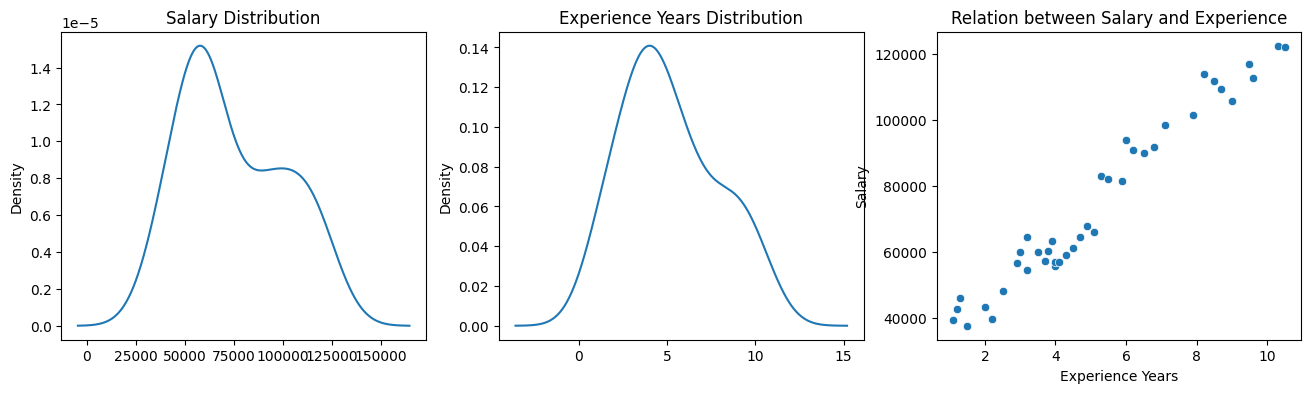

In [50]:
fig,(ax1, ax2, ax3)  = plt.subplots(1,3,figsize=(16,4))

df["Salary"].plot(kind="kde",ax=ax1, title="Salary Distribution")
df["Experience Years"].plot(kind="kde",ax=ax2, title="Experience Years Distribution")

ax3.set_title("Relation between Salary and Experience")
sns.scatterplot(data=df, x="Experience Years", y="Salary", ax=ax3)

In [51]:
# train test split

X_train, X_test, Y_train, Y_test = train_test_split(df['Experience Years'], df['Salary'], test_size=0.2, random_state=42) 

In [52]:
# X_train.values returns a numpy array which is in 1D and we need 2D.
print(X_train.shape)
print(Y_train.shape)
print(X_train.values.reshape(-1,1).shape)
print(Y_train.values.reshape(-1,1).shape)

(32,)
(32,)
(32, 1)
(32, 1)


In [53]:
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

type(X_train), type(X_test), X_train.shape, X_test.shape

(numpy.ndarray, numpy.ndarray, (32, 1), (8, 1))

## Step 3: Train the Model


In [ ]:
    
# 3.1 Import Libraries: Already done

# 3.2 Create an Object
lr = LinearRegression()

# 3.3 fit the data
lr.fit(X_train, Y_train)

LinearRegression()

## Step 4: Predict and Evaluate


In [ ]:

# Predict
y_pred = lr.predict(X_test)

In [56]:
# Evaluate
mse = mean_squared_error(Y_test, y_pred)
r2  = r2_score(Y_test, y_pred)


In [57]:
print("Mean Squared Error: ", mse)
print("R2 Score: ", r2)

Mean Squared Error:  48077731.16919359
R2 Score:  0.9068577573647874


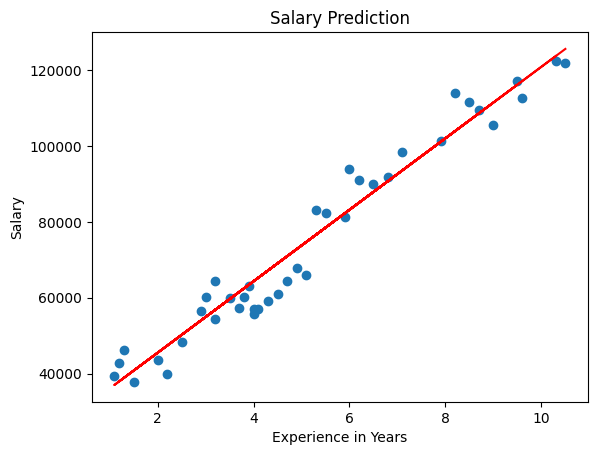

In [58]:
# Regression line with actual data
plt.scatter(df["Experience Years"], df["Salary"])
plt.plot(X_train, lr.predict(X_train), color="red")

plt.xlabel("Experience in Years")
plt.ylabel("Salary")
plt.title("Salary Prediction")
plt.show()


## Step 5: Find Y_intercept and slope


In [ ]:

m = lr.coef_
c = lr.intercept_
x = 1.1         # Trying with new input
y = m * x + c   # Predicted Salary
print(f"Salary for {x} years of experience: ", y)

Salary for 1.1 years of experience:  [37065.0845759]


#### End of Task